# Task 1

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Task 2

In [4]:
# No missing values in this dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 3

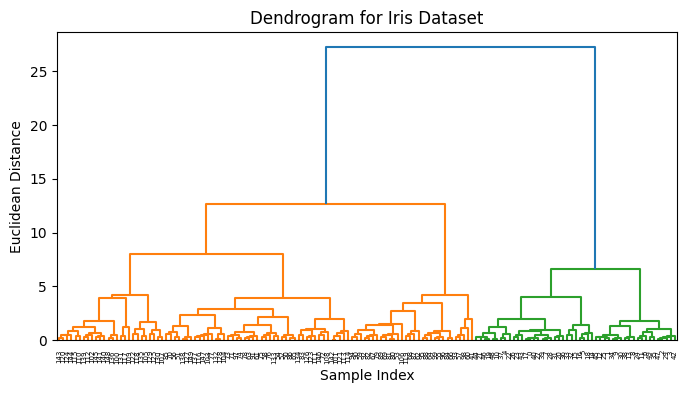

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Use Ward's method to minimize variance within clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(8, 4))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

# Task 4-5

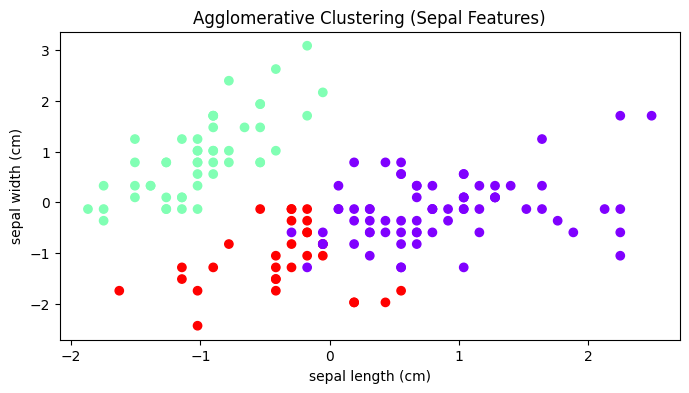

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Apply Clustering with 3 clusters as iris contains 3 species but according to dendogram and maths there should be 2 clusters
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X_scaled)

# Visualization
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering (Sepal Features)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# Task 6

- ARI = 1.0: Perfect Model. 

- 0.5 < ARI < 1.0: Good Clustering 

- ARI ≈ 0.0: Random Labelling


In [10]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index: {ari_score:.4f}")

Adjusted Rand Index: 0.6153
